In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("spam.csv",encoding= 'ISO-8859-1')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df = df.iloc[:, :-3]

In [6]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [7]:
df.shape

(5572, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.rename(columns={'v1': 'Category'}, inplace=True)

C:\Users\awach\AppData\Local\Temp\ipykernel_5140\1728846346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'v1': 'Category'}, inplace=True)


In [10]:
df.rename(columns={'v2': 'Message'}, inplace=True)

C:\Users\awach\AppData\Local\Temp\ipykernel_5140\2975171343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'v2': 'Message'}, inplace=True)


In [11]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [12]:
df['Ham'] = df['Category'].apply(lambda x:1 if x=='ham' else 0)
df

C:\Users\awach\AppData\Local\Temp\ipykernel_5140\389969514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ham'] = df['Category'].apply(lambda x:1 if x=='ham' else 0)


,Category,Message,Ham
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0
5568,ham,Will Ì_ b going to esplanade fr home?,1
5569,ham,"Pity, * was in mood for that. So...any other s...",1
5570,ham,The guy did some bitching but I acted like i'd...,1


In [13]:
x  = df['Message']
y = df['Ham']

In [14]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest,ytrain,ytest = tts(x,y)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
v = CountVectorizer()

In [17]:
x_train_count = v.fit_transform(xtrain)

In [18]:
x_train_count = x_train_count.toarray()

In [19]:
type(x_train_count)

numpy.ndarray

In [20]:
x_train_count.shape

(4179, 7471)

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
mnb = MultinomialNB()

In [23]:
mnb.fit(x_train_count,ytrain)

MultinomialNB()

In [24]:
x_test_count = v.transform(xtest)

In [25]:
y_pred = mnb.predict(x_test_count)

In [26]:
import joblib
joblib.dump(mnb,'spam_model4.pkl')


['spam_model4.pkl']

In [27]:
joblib.dump(v,'count_vectorizer4.pkl')

['count_vectorizer4.pkl']

In [28]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [29]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       166
           1       0.99      1.00      0.99      1227

    accuracy                           0.99      1393
   macro avg       0.98      0.95      0.97      1393
weighted avg       0.99      0.99      0.99      1393



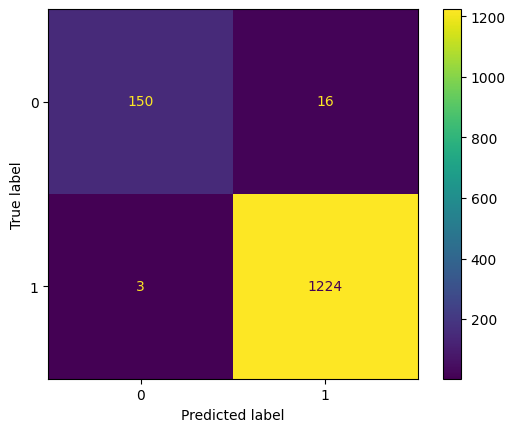

In [30]:
print(ConfusionMatrixDisplay.from_predictions(ytest,y_pred))

In [31]:
'''datta = []
inp = input()
datta.append(inp)
datta_count = v.transform(datta)
op = mnb.predict(datta_count)
if op == 0:
  print("Looks like a SPAM")
else:
  print("It is fine")'''

'datta = []\ninp = input()\ndatta.append(inp)\ndatta_count = v.transform(datta)\nop = mnb.predict(datta_count)\nif op == 0:\n  print("Looks like a SPAM")\nelse:\n  print("It is fine")'

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
gnb =  GaussianNB()

In [34]:
gnb.fit(x_train_count,ytrain)

GaussianNB()

In [35]:
x_test_count = x_test_count.toarray()

In [36]:
y_pred_gnb = gnb.predict(x_test_count)

In [37]:
print(classification_report(ytest,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.57      0.88      0.70       166
           1       0.98      0.91      0.95      1227

    accuracy                           0.91      1393
   macro avg       0.78      0.90      0.82      1393
weighted avg       0.93      0.91      0.92      1393



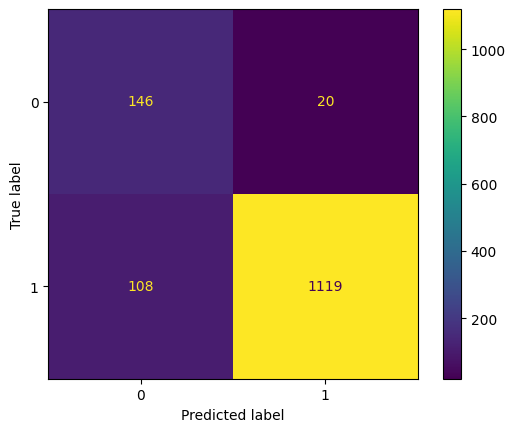

In [38]:
print(ConfusionMatrixDisplay.from_predictions(ytest,y_pred_gnb))

Exporting Model